# 2. Overview of supervised learning

### Exercise 2.1
**Suppose each of $K$-classes has an associated target $t_k$ , which is a vector of all zeros, except a one in the $k$th position. Show that classifying to the largest element of $\hat y$ amounts to choosing the closest target, $$\min_{k}\vert\vert t_k −
\hat y\vert\vert$$ if the elements of $\hat y$ sum to one.**

The distance between $t_k$ and $\hat y$ is 
$$\vert\vert t_k - \hat y \vert\vert = \sqrt{\sum_i\left(t_{k_i} - \hat y_i\right)^2} = \sqrt{\sum_{i\neq k}\hat y_i^2 + \left(1 - \hat y_k\right)^2} = \sqrt{1+ \sum_i \hat y_i^2 - 2\hat y_k}$$

Since $1 + \sum_i \hat y_i^2$ is the same for all $k$, $\hat y$ is closest to the $t_k$ target for which $\hat y_k$ is greatest.

This is useful in categorical predictions. For example, in letter recognition, we can generate a vector output of dimensionality equal to the number of letters in the alphabet and assign the input to the letter corresponding to the largest output value. It is not necessary that the elements of $\hat y$ sum to one, but if they do we can interpret the $y_k$ value as the probability of the input to belong to class $k$.

### Exercise 2.2
**Show how to compute the Bayes decision boundary for the simulation example in Figure 2.5.**

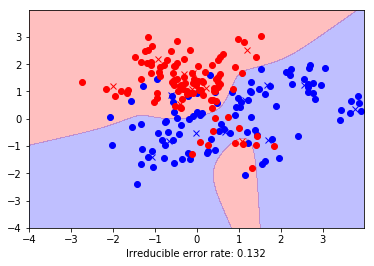

In [3]:
import numpy as np
from numpy.random import seed, randint, rand
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

seed(2666)

blue_m = [1,0]
orange_m = [0,1]
cov = np.eye(2)
cov_points = cov/5
n_means = 10

# Generate the 10 means for each class
blue_means = multivariate_normal(blue_m, cov).rvs(n_means)
orange_means = multivariate_normal(orange_m, cov).rvs(n_means)


# Generate the 100 points for each class:
# - Draw a mean from the 10 possible means with P=1/10
# - Draw a point from a multivariate normal with that mean and cov = eye()/5
blue_points, orange_points = np.empty([100, 2]), np.empty([100, 2])

for i in range(100):
    k_blue, k_orange = randint(n_means), randint(n_means)
    blue_points[i, :] = multivariate_normal(blue_means[k_blue, :], cov_points).rvs()
    orange_points[i, :] = multivariate_normal(orange_means[k_orange, :], cov_points).rvs()

# Define the function of the Bayes optimal decision boundary
def blue_pdf(x):
    pdf = 0
    for i in range(10):
        pdf += multivariate_normal(blue_means[i,:], cov_points).pdf(x)
    return pdf

def orange_pdf(x):
    pdf = 0
    for i in range(10):
        pdf += multivariate_normal(orange_means[i,:], cov_points).pdf(x)
    return pdf

def pdf_subtract(x):
    p = blue_pdf(x) - orange_pdf(x)
    return p

# Compute the irreducible error
correct = 0
total = 3000
for i in range(total):
    # Select the mean
    mean = randint(n_means)
    if rand() > 0.5:
        mean = blue_means[mean]
        color = 0
    else:
        mean = orange_means[mean]
        color = 1

    # Draw a point
    point = multivariate_normal(mean, cov_points).rvs()

    # Predict the color
    if pdf_subtract(point) > 0:
        predicted_color = 0
    else:
        predicted_color = 1

    if predicted_color == color:
        correct += 1

irr_error_rate = 1 - correct/total

# Plot the means, points and Bayes boundary
x = np.arange(-4,4,0.025)
y = np.arange(-4,4,0.025)
X, Y = np.meshgrid(x, y)

plt.plot(blue_means[:,0], blue_means[:,1], 'bx')
plt.plot(orange_means[:,0], orange_means[:,1], 'rx')
plt.plot(blue_points[:, 0], blue_points[:, 1], 'bo')
plt.plot(orange_points[:, 0], orange_points[:, 1], 'ro')
plt.contourf(X, Y, pdf_subtract(np.dstack((X,Y))), levels=[-np.Inf, 0, np.Inf],
colors=('red', 'blue'), alpha=0.25)
plt.xlim([-4, 3.975])
plt.ylim([-4, 3.975])
plt.xlabel('Irreducible error rate: ' + str(irr_error_rate))
plt.show()

### Exercise 2.3
**Derive equation (2.24) for the median distance from the origin to the closest data point with $N$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin.**

Let $V_p(1)$ be the volume of a $p$-dimensional unit ball. Then, the volume of a ball of radius $R$ is $V_p(R) = V_p(1) R^p$.

The probability that a uniformly drawn random point will have a distance $D > d$ is proportional to the volume difference $V_p(1)(1-d^p)$. Normalizing it, we find $$P(D > d) = 1-d^p.$$

Since each random point is drawn independently from the others, $$P(\text{all $N$ distances} > d) = P(\text{closest distance} > d) = (1-d^p)^N.$$

Then, the CDF is $$P(\text{closest distance} \leq d) = 1 - (1-d^p)^N,$$ and the median is the value $d$ such that the CDF is $1/2$, which is $$d = \left(1-\frac{1}{2}^{1/N}\right)^{1/p}$$

Notice that we need to use $P(D > d) = 1-d^p$ because $P(\text{all $N$ distances} > d) = P(\text{closest distance} > d)$. With  $P(D < d) = d^p$ we could compute $P(\text{all $N$ distances} < d) = P(\text{furthest distance} < d)$.

Since we have the CDF, we can also compute the mean. The PDF is (let now $x$ be the distance)
\begin{equation}
f(x) = \frac{d}{dx} F(x) = pN\left(1-x^p\right)^{N-1}x^{p-1}
\end{equation}
and the mean is
\begin{align}
E[\text{closest distance}] &= \int_0^1{x f(x) dx} = \int_0^1{pN\left(1-x^p\right)^{N-1}x^p dx} \\
&= \frac{N \Gamma (N) \Gamma \left(\frac{1}{p}\right)}{p \Gamma \left(N+\frac{1}{p}+1\right)}
\end{align}

For example, for $N = 500$ and $p = 10$, the median is 0.5178 and the mean 0.5110.

### Exercise 2.4
**The edge effect problem discussed on page 23 is not peculiar to uniform sampling from bounded domains. Consider inputs drawn from a spherical multinormal distribution $X ∼ N(0, \mathbb{I}_p)$. The squared distance from any sample point to the origin has a $\chi^2_p$ distribution with mean $p$.
Consider a prediction point $x_0$ drawn from this distribution, and let $a = x_0 / \vert\vert x_0 \vert \vert$ be an associated unit vector.**

**Let $z_i = a^T x_i$ be the projection of each of the training points on this direction. Show that the $z_i$ are distributed $N(0, 1)$ with expected squared distance from the origin 1, while the target point has expected squared distance $p$ from the origin.**

Since the points are drawn from a spherical multinormal distribution, each of the components of a random vector $x_i$ are normally distributed
\begin{equation}
x_i^j \sim N(0, 1).
\end{equation}
But due to the spherical symmetry of the distribution, we can rotate the axes, so that any of the basis unit vectors coincides with $a$. For example, we can make $e_1 = a$. Then, 
\begin{equation}
z_i = a^T x_i = x_i^1 \sim N(0, 1).
\end{equation}
Since the squared norm of $k$ standard normally distributed variables is a chi-squared distribution with k degrees of freedom, with mean $k$, the expected squared distance from the origin is $1$, while the target point has expected squared distance $p$.

**Hence for $p = 10$, a randomly drawn test point is about $3.1$ standard
deviations from the origin, while all the training points are on average
one standard deviation along direction $a$. So most prediction points see
themselves as lying on the edge of the training set.**

### Exercise 2.5
**(a) Derive equation (2.27). The last line makes use of (3.8) through a conditioning argument.**

The equation we want to derive is the EPE of a regression line fitted by least squares when the actual outputs are given by
$y_i = x_i^T\beta + \varepsilon_i$, with $\varepsilon_i \sim N(0, \sigma^2)$.

Then, the training set $\mathcal{T}$ is given by the input matrix $X$ and the outputs $Y = X\beta + \varepsilon$ or, equivalently, by $X$ and $\varepsilon$. $X$ is a $N\times p$ matrix, $\beta$ is a $p\times 1$ vector, and $Y$ and $\varepsilon$ are $N\times 1$ vectors. $N$ is the number of observations and $p$ the total number of parameters, including the constant.

Since $\hat \beta$ is found by least squares, it is
\begin{equation}
\hat \beta = (X^T X)^{-1}X^TY = \beta + (X^T X)^{-1}X^T\varepsilon
\end{equation}
so we can write
\begin{equation}
\hat y_0 = x_0^T\hat \beta = x_0^T\beta + \sum_{i=1}^N l_i(x_0)\varepsilon_i
\end{equation}
with
\begin{equation}
l_i(x_0) = \left[X(X^TX)^{-1}x_0\right]_i
\end{equation}

We want to know the EPE as a function of $x_0$. The random variables are the training set $\mathcal{T}$ and the output $y_0 = x_0^T\beta + \varepsilon_0$. We first write the two expected values explicitly, conditioning $y_0$ on $x_0$ and use the usual trick of adding and subtracting the expected value of a random variable to obtain the variance and the bias. Following the same notation of the book, we will write the conditional expected value of a general random value as $E_{y_0 \vert x_0}\left[f(y_0)\right]$ and as $E\left[y_0 \vert x_0 \right]$ when $f(y_0) = y_0$.

\begin{align}
\text{EPE}(x_0) &= E(y_0 - \hat y_0)^2 = E_{y_0 \vert x_0} E_\mathcal{T} (y_0 - \hat y_0)^2 \\
&= E_{y_0 \vert x_0} E_\mathcal{T} \left(y_0 - E(y_0 \vert x_0) + E(y_0 \vert x_0) - \hat y_0\right)^2 \\
&= E_{y_0 \vert x_0} E_\mathcal{T} \left[\left( y_0 - E(y_0 \vert x_0)\right)^2 + \left( E(y_0 \vert x_0) - \hat y_0\right)^2  + 2\left( y_0 - E(y_0 \vert x_0)\right)\left( E(y_0 \vert x_0) - \hat y_0\right) \right]
\end{align}

The last term is $2E_{y_0 \vert x_0}\left(y_0 - E(y_0 \vert x_0)\right)E_\mathcal{T}\left(E(y_0 \vert x_0) - \hat y_0\right)$ which is 0 due to the first expected value. Moreover, the first term does not depend on the training set $\mathcal{T}$, so it becomes a variance. In the second term we can use the same trick,

\begin{align}
\text{EPE}(x_0) &= E_{y_0 \vert x_0}\left[ y_0 - E(y_0 \vert x_0)\right]^2 + E_\mathcal{T}\left[ E(y_0 \vert x_0) - \hat y_0\right]^2 \\
&= \text{Var}(y_0 \vert x_0) + E_\mathcal{T}\left[ \hat y_0 - E_\mathcal{T}(\hat y_0) + E_\mathcal{T}(\hat y_0) - E(y_0 \vert x_0)\right]^2 \\
&= \text{Var}(y_0 \vert x_0) + E_\mathcal{T}\left[\hat y_0 - E_\mathcal{T}\left(\hat y_0\right)\right]^2 + E_\mathcal{T}\left[E_\mathcal{T}\left(\hat y_0\right) - E(y_0 \vert x_0) \right]^2 \\
&= \text{Var}(y_0 \vert x_0) + E_\mathcal{T}\left[\hat y_0 - E_\mathcal{T}\left(\hat y_0\right)\right]^2 + E_\mathcal{T}^2\left[\hat y_0 - x_0^T\beta \right] \\
&= \text{Var}(y_0 \vert x_0) + \text{Var}(\hat y_0) + \text{Bias}^2(\hat y_0)
\end{align}


In the last equality we have used the definition of the bias of an estimator, $\text{Bias}(\hat \theta) = E\left[\hat \theta - \theta\right]$. It is sometimes written as $\text{Bias}(\hat \theta) = E\left[\hat \theta\right] - \theta$ but *I think* the former equality is more general, and the latter is only true if $\theta$ is not a random variable.

The first term is
$$
\text{Var}(y_0 \vert x_0) = \text{Var}(x_0^T\beta + \varepsilon \,\vert\, x_0) = \text{Var}(\varepsilon) = \sigma^2
$$
The second one is, using the law of total variance,
\begin{align}
\text{Var}_\mathcal{T}\left(\hat y_0\right) &= \text{Var}_\mathcal{T}\left(x_0^T \hat \beta \right) \\
&= E_X\left[\text{Var}_\mathcal{\varepsilon}\left[x_0^T\hat\beta \,\vert\, X\right]\right] + \text{Var}_X\left[E_\mathcal{\varepsilon}\left[x_0^T\hat\beta \,\vert\, X\right]\right] \\
&= E_X\left[x_0^T \left(X^T X\right)^{-1} x_0 \sigma^2\right]
\end{align}
In the last equality we have used the expression of $\hat \beta$ in terms of $X$ and $\varepsilon$ and Eq. (3.8) from the book. The last term vanishes because $E(\varepsilon) = 0$.
Finally, the last term in the expression for the EPE is
$$
\text{Bias}^2\left(\hat y_0\right) = \left(E\left[\hat y_0\right] - x_0^T \beta\right)^2 = \left(x_0^T E\left[\hat \beta\right] - x_0^T \beta\right)^2
$$
Using again the expression for $\hat \beta$ in terms of $X$ and $\varepsilon$ and conditioning on $X$,
$$
E\left[\hat \beta\right] = E\left[\beta + \left(X^T X\right)^{-1}\varepsilon\right] = \beta + E_X\left[E_\varepsilon\left[\left(X^TX\right)^{-1}X^T\varepsilon \,\vert\, X\right]\right] = \beta
$$
Then, the bias is 0 and the EPE is
\begin{align}
EPE(x_0) &= \text{Var}(y_0 \vert x_0) + \text{Var}(\hat y_0) + \text{Bias}^2(\hat y_0) \\
&= \sigma^2 + E_X\left[x_0^T \left(X^T X\right)^{-1} x_0 \sigma^2\right]
\end{align}

**(b) Derive equation (2.28), making use of the cyclic property of the trace operator [trace(AB) = trace(BA)], and its linearity (which allows us to interchange the order of trace and expectation).**

Remember that $X$ is an $N\times p$ matrix,
$$
X =
\begin{pmatrix}
x^T_1 \\ x^T_2 \\ \vdots \\ x^T_N
\end{pmatrix}
$$
so
$$
X^TX = \begin{pmatrix}
x_1 & x_2 & \ldots & x_N
\end{pmatrix}\begin{pmatrix}
x^T_1 \\ x^T_2 \\ \vdots \\ x^T_N
\end{pmatrix} = \sum_{i=1}^N{x_i x^T_i}
$$
The covariance matrix of a random variable $Z$ is defined as $\text{Cov}(Z) = E(ZZ^T) - E(Z)E(Z^T)$. Since we are assuming $E(x) = 0$, and all the $x$ vectors are drawn from the same distribution,
$$
E(X^TX) = NE(x x^T) = N\text{Cov}(x)
$$

**Warning: in general, $E(f(X)) \neq f(E(X))$, so in principle $E\left[(X^TX)^{-1}\right] \neq \left[E(X^TX)\right]^{-1}$, but it seems that's what they are doing in the book. It could be related to the fact that we are taking the $N\rightarrow \infty$ limit, but I'm not sure.
The solution may go as follows:
**
$$
E\left[(X^TX)^{-1}\right] = E\left[\left(N xx^T\right)^{-1}\right]
$$
$xx^T$ is positive definite, which *probably* means that we can use some sort of Taylor expansion with leading term $1/E(Nxx^T)$ and higher order terms suppresed by powers of 1/N. This is suggested [here](https://stats.stackexchange.com/a/80884) but there are also commments arguing against it.

In any case, assuming the approximation is valid,
\begin{align}
E_{x_0} EPE(x_0) &= E_{x_0}\left[\sigma^2 + E\left[x_0^T\left(X^TX\right)^{-1} x_0 \sigma^2\right]\right] \\
&\simeq \sigma^2 + \frac{\sigma^2}{N}E_{x_0}\left[x_0^T\text{Cov}(x)^{-1}x_0\right]
\end{align}
Since $x_0^T\text{Cov}(x)^{-1}x_0$ is a scalar, it is its own trace. Using the cyclic property of the trace and its linearity
$$
E_{x_0}\left[x_0^T\text{Cov}(x)^{-1}x_0\right] = E_{x_0}\left[\text{Tr}\left(\text{Cov}(x)^{-1}x_0x_0^T\right)\right] = \text{Tr}\left[\text{Cov}(x)^{-1} E_{x_0}\left(x_0 x_0^T\right)\right] = \text{Tr}\left[\text{Cov}(x)^{-1}\text{Cov}(x_0)\right]
$$
Since the training points $x$ and the test point $x_0$ are drawn from the same distribution, we are left with the trace over the $p\times p$ identity matrix, which is $p$, so
$$
E_{x_0} EPE(x_0) \simeq \sigma^2 + \frac{\sigma^2}{N} p
$$
for large $N$.

### Exercise 2.6
**Consider a regression problem with inputs $x_i$ and outputs $y_i$, and a parameterized model $f_\theta(x)$ to be fit by least squares. Show that if there are observations with *tied* or *identical* values of $x$, then the fit can be obtained from a reduced weighted least squares problem.**

The result is independent of the model $f_\theta$, as long as we fit $\hat \theta$ by least squares:
$$
\hat \theta = \text{argmin}_\theta \sum_i \left(f_\theta(x_i) - y_i\right)^2
$$
Let's assume there are $n$ observations of $x_j$ with outputs $y_{j_1} \ldots y_{j_n}$. Then, $\hat \theta$ is

\begin{align}
\hat \theta &= \text{argmin}_\theta \left[\sum_{i\neq j}\left(f_\theta(x_i) - y_i\right)^2 + \sum_{k=1}^n\left(f_\theta(x_j) - y_{j_k}\right)^2\right] \\
&= \text{argmin}_\theta \left[\sum_{i\neq j}\left(f_\theta(x_i) - y_i\right)^2 + \sum_{k=1}^n\left(f_\theta(x_j)^2 -2f_\theta(x_j)y_{j_k} + y_{j_k}^2\right)\right] \\
&= \text{argmin}_\theta \left[\sum_{i\neq j}\left(f_\theta(x_i) - y_i\right)^2 + nf_\theta(x_j)^2 -2f_\theta(x_j)\sum_{k=1}^n y_{j_k} + \sum_{k=1}^n y_{j_k}^2\right] \\
&= \text{argmin}_\theta \left[\sum_{i\neq j}\left(f_\theta(x_i) - y_i\right)^2 + nf_\theta(x_j)^2 -2f_\theta(x_j)\sum_{k=1}^n y_{j_k}\right]
\end{align}

In the last equality we have dropped the term that doesn't depend on $\theta$. We can generalize this expression to the case in which there is more than one group of tied inputs. In general, it will be
$$
\hat \theta = \text{argmin}_\theta \sum_i \left(n_i f_\theta(x_i)^2 - 2f_\theta(x_i)\sum_{k=1}^{n_i} y_{i_k} \right)
$$
with $x_i$ each unique input, $n_i$ its degeneracy and $y_{i_k}$ the corresponding $n_i$ outputs.

This is the same as a reduced weighted least squares fit with the degeneracy of each input as the weights, and the average of each group of outputs as the targets:
\begin{align}
\hat \theta &= \text{argmin}_\theta \sum_i n_i\left(f_\theta(x_i) - \bar y_i\right)^2 \\
&= \text{argmin}_\theta \sum_i \left(n_i f_\theta(x_i)^2 -2n_i f_\theta(x_i)\bar y_i + n_i \left(\bar y_i\right)^2\right) \\
&= \text{argmin}_\theta \sum_i \left(n_i f_\theta(x_i)^2 -2 f_\theta(x_i)\sum_{k=1}^{n_i} y_{i_k}\right)
\end{align}

### Exercise 2.7

**Suppose we have a sample of $N$ pairs $x_i$, $y_i$ drawn i.i.d. from the distribution characterized as follows:**
* **$x_i \sim h(x)$, the design density**
* **$y_i = f(x_i) + ε_i$, $f$ is the regression function**
* **$\varepsilon_i \sim (0, \sigma^2)$ (mean zero, variance $\sigma^2$)**

**We construct an estimator for $f$ linear in the $y_i$,
$$
\hat f(x_0) = \sum_{i=1}^N l_i(x_0; \mathcal{X}) y_i,
$$
where the weights $l_i(x_0; \mathcal{X})$ do not depend on the $y_i$, but do depend on the entire training sequence of $x_i$, denoted here by $\mathcal{X}$.**

**(a) Show that linear regression and k-nearest-neighbor regression are members of this class of estimators. Describe explicitly the weights $l_i(x_0; \mathcal{X})$ in each of these cases.**

In a linear regression, an output is
$$
\hat y(x_0) = x_0^T \hat \beta = x_0^T\left(X^T X\right)^{-1} X^T Y = \left(x_0^T\left(X^T X\right)^{-1} X^T)\right)_i Y_i
$$
so it is an estimator of this kind with weights
$$
l_i(x_0; \mathcal{X}) = \left(x_0^T\left(X^T X\right)^{-1} X^T\right)_i
$$

In a k-NN method, we compute $\hat y(x_0)$ as the mean of the outputs of the k nearest neighbors of $x_0$. Then, it is also an estimator of this kind with weights
$$
l_i(x_0; \mathcal{X}) = \begin{cases}\frac{1}{k} \text{ if $x_i \in N_k(x_0)$} \\ 0 \text{ otherwise} \end{cases}
$$

**(b) Decompose the conditional mean-squared error
$$
E_{\mathcal{Y} \vert \mathcal{X}}\left(f(x_0) - \hat f(x_0)\right)^2
$$
into a conditional squared bias and a conditional variance component. Like $\mathcal{X}$, $\mathcal{Y}$ represents the entire training sequence of $y_i$.**

There are two random variables, $\mathcal{X}$ and $\mathcal{Y}$ (or $\mathcal{X}$ and $\varepsilon$). $f(x_0)$ is a deterministic unknown function, and $\hat f(x_0)$ is a random variable which depends on $\mathcal{X}$ and $\mathcal{Y}$ as
$$
\hat f(x_0) = \sum_{i=1}^N l_i\left(x_0;\mathcal{X}\right)y_i
$$
We assume that the mean-squared error is conditioned on $x_0$. We can compute the expected values $E\left[\hat f(x_0)\right]$ and $E\left[\hat f(x_0)\,\vert\mathcal{X}\right]$ (they are also conditioned on $x_0$, but I won't write it for simplicity). Using the usual trick of adding and subtracting the expected value of the random variable in the MSE, we find
\begin{align}
E_{\mathcal{Y}\vert\mathcal{X}}\left[\left(f(x_0) - \hat f(x_0)\right)^2\right] &= E_{\mathcal{Y}\vert\mathcal{X}}\left[\left(f(x_0) - E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0)\right] + E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0)\right] - \hat f(x_0)\right)^2\right]\\
&= E_{\mathcal{Y}\vert\mathcal{X}}^2\left[f(x_0) - E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0)\right]\right] + E_{\mathcal{Y}\vert\mathcal{X}}\left[\left(E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0)\right] - \hat f(x_0)\right)^2\right] \\
&= \text{Bias}^2\left[\hat f(x_0) \,\vert\mathcal{X}\right] + \text{Var}\left[\hat f(x_0) \,\vert\mathcal{X}\right]
\end{align}

**(c) Decompose the (unconditional) mean-squared error
$$
E_{\mathcal{Y}, \mathcal{X}}\left(f(x_0) - \hat f(x_0)\right)^2
$$
into a squared bias and a variance component.**

There are two options, the obvious one is to use again the same trick as always and find
$$
E_{\mathcal{Y}, \mathcal{X}}\left(f(x_0) - \hat f(x_0)\right)^2 = \text{Bias}^2\left[\hat f(x_0)\right] + \text{Var}\left[\hat f(x_0)\right]
$$
The other option is to compute the expected value of the conditional MSE,
$$
E_{\mathcal{Y}, \mathcal{X}}\left(f(x_0) - \hat f(x_0)\right)^2 = E_{\mathcal{X}}E_{\mathcal{Y}\vert\mathcal{X}}\left[\left(f(x_0) - \hat f(x_0)\right)^2\right]
$$
For the variance term, we can use the law of total variance to get
$$
E_{\mathcal{X}}\left[\text{Var}\left[\hat f(x_0) \,\vert\mathcal{X}\right]\right] = \text{Var}\left[\hat f(x_0)\right] - \text{Var}\left[E\left[\hat f(x_0) \,\vert\mathcal{X}\right]\right]
$$
For the bias term, we can add and subtract $E_\mathcal{X}\left[E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0)\,\vert\mathcal{X}\right]\right]$ and proceed as usual:
\begin{align}
E_\mathcal{X}\left[\text{Bias}^2\left[\hat f(x_0)\,\vert\mathcal{X}\right]\right] &= E_\mathcal{X}\left[\left(E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0) - f(x_0)\right]\right)^2\right]\\
&= E_\mathcal{X}\left[\left(E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0) -E_\mathcal{X}\left[E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0)\,\vert\mathcal{X}\right]\right] + E_\mathcal{X}\left[E_{\mathcal{Y}\vert\mathcal{X}}\left[\hat f(x_0)\,\vert\mathcal{X}\right]\right] -f(x_0)\right]\right)^2\right]\\
&= \text{Var}\left[E\left[\hat f(x_0) \,\vert\mathcal{X}\right]\right] + \text{Bias}^2\left[\hat f(x_0)\right]
\end{align}
Adding both terms we get the same result as before.

**(d) Establish a relationship between the squared biases and variances in the above two cases.**

I don't understand the question. It could mean to establish a relationship between the conditional and unconditional squared biases and variances. In that case, I have established such a relationship in the previous answer. It could also mean to relate the biases and variances of the least squares and k-NN models. In that case, I don't think we can do much without knowing the true function $f(x_0)$. The bias depends directly on $f$, and the variance depends on $\hat f$, but the estimator depends on the true function through the $y_i$.

We could proceed if we assumed $f$ to be a linear regression (the wording of the exercise states that $f$ is a *regression function*), but both cases, the linear least squares and the k-NN, have been done in the book (Section 2.5 and Exercise 2.5 for the least squares and Section 2.9 for the k-NN).